<a href="https://colab.research.google.com/github/mdefilippi85/P-Project-Big-Data/blob/master/example%20geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
pip install simpledbf 

In [ ]:
from simpledbf import Dbf5

In [ ]:
!pip install PyDrive

In [6]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 962kB 7.8MB/s 
     |████████████████████████████████| 10.9MB 27.7MB/s 
     |████████████████████████████████| 14.7MB 47.2MB/s 


# a) authorize Google SDK to access Google Drive from Colab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# b) Uploading files from your local file system

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sentinel_asc_mosul_PS_75_0.dbf to sentinel_asc_mosul_PS_75_0.dbf
Saving sentinel_asc_mosul_PS_75_0.shp to sentinel_asc_mosul_PS_75_0.shp
Saving sentinel_asc_mosul_PS_75_0.shx to sentinel_asc_mosul_PS_75_0.shx
User uploaded file "sentinel_asc_mosul_PS_75_0.dbf" with length 46899060 bytes
User uploaded file "sentinel_asc_mosul_PS_75_0.shp" with length 1244224 bytes
User uploaded file "sentinel_asc_mosul_PS_75_0.shx" with length 276572 bytes


In [7]:
df_regioni = gpd.read_file(filename="/content/sentinel_asc_mosul_PS_75_0.shp")
df_regioni.head()

,velocity,coherence,MuSigma,Hprecision,Vprecision,range,azimuth,SubArea ID,Lon,Lat,xpos,ypos,zpos,Z,ALOS,ILOS,Hcorrectio,Tot_D[mm],D_20141015,D_20141027,D_20141108,D_20141202,D_20141214,D_20141226,D_20150107,D_20150119,D_20150131,D_20150212,D_20150224,D_20150308,D_20150320,D_20150401,D_20150413,D_20150425,D_20150507,D_20150531,D_20150612,D_20150624,D_20150706,D_20150718,D_20150730,D_20150811,D_20150823,D_20150916,D_20150928,D_20151022,D_20151103,D_20151115,D_20151209,D_20160126,D_20160219,D_20160314,D_20160407,D_20160501,D_20160525,D_20160606,D_20160630,D_20160712,D_20160724,D_20160805,D_20160817,D_20160829,D_20160910,D_20160922,D_20161004,D_20161016,D_20161028,D_20161109,D_20161121,D_20161203,D_20161215,D_20161227,D_20170108,D_20170120,D_20170201,D_20170213,D_20170225,geometry
0,-17.155914,0.760115,2.244241,5.396274,0.583687,1596,18,0,42.832465,36.600588,42.832465,36.600588,292.527462,276.155231,81.398284,41.053163,0.407173,-866.032680,0.0,1.978683,-0.300277,0.713891,2.259692,3.036425,2.813140,4.203813,4.633524,0.841720,0.840869,3.887440,-1.529544,-1.716930,-10.825856,-12.292311,-3.529060,-4.667488,-5.070472,-5.364742,-6.395319,-6.935039,-9.368250,-6.174155,-6.611887,-11.136535,-8.511400,-10.527902,-9.097141,-13.120599,-8.217773,-16.560699,-17.875582,-23.442324,-27.312429,-22.116587,-22.176399,-22.546537,-22.453358,-23.193447,-25.255337,-25.424191,-25.546549,-27.489496,-26.972754,-28.734852,-28.257423,-29.002588,-29.167349,-25.720694,-30.077944,-29.914965,-32.566578,-27.222940,-30.644464,-33.699978,-31.156403,-35.018276,-30.299057,POINT Z (42.83246 36.60059 276.15523)
1,-0.848589,0.771448,2.769551,5.248797,0.567735,1783,18,0,42.836132,36.601098,42.836132,36.601098,293.749445,277.372022,81.398363,41.072264,-6.161583,-605.897588,0.0,-4.465186,-4.903749,-9.021134,-10.754783,-7.271605,-10.283998,-13.229429,-9.583864,-7.542059,-19.725178,-7.985753,-8.642462,-4.596359,-1.071814,-15.150064,-7.817950,-10.894894,-16.445322,-10.582101,-9.897250,-10.922783,-12.859779,-12.452719,-14.129107,-10.419423,-12.360255,-12.968815,-13.344065,-12.880995,-10.662228,-10.196232,-13.264165,-8.506768,-7.547776,-6.349545,-7.121390,-9.083426,-8.175913,-9.275042,-9.531351,-9.557755,-10.628255,-9.101460,-10.797873,-11.523804,-11.640004,-11.318207,-10.942604,-10.276116,-11.097973,-11.388171,-13.384666,-12.665258,-13.081221,-10.715229,-9.653298,-12.364065,-13.844898,POINT Z (42.83613 36.60110 277.37202)
2,-2.036308,0.756646,2.219078,5.441145,0.588541,1784,18,0,42.836082,36.601091,42.836082,36.601091,288.234594,271.857242,81.398361,41.071771,-11.786121,-89.011030,0.0,5.147566,4.042304,0.827700,-3.454594,3.060608,-6.690978,-10.041996,4.607656,4.313585,12.571829,0.291753,-2.817634,2.691515,-2.621150,-7.833409,1.646994,-1.684880,1.889811,-0.107388,-0.498005,1.582877,-0.669442,-3.002425,-5.664379,-0.559016,-2.005085,-3.781449,-4.965973,-5.107168,-2.588737,-0.647684,-7.678429,-0.445590,-0.540609,2.012810,1.024957,-0.344027,-0.113057,-0.992088,-0.806272,-1.312740,-1.971702,-0.628295,-2.571627,-3.322937,-2.734343,-2.294222,-2.862317,-2.756006,-3.117642,-4.273801,-5.137747,-4.605596,-6.125284,-3.533073,-1.829291,-4.886675,-5.098236,POINT Z (42.83608 36.60109 271.85724)
3,0.479300,0.776480,2.433778,5.182433,0.560557,1631,19,0,42.833086,36.600802,42.833086,36.600802,289.678574,273.304922,81.398321,41.056405,-2.965034,-188.290379,0.0,-2.097644,-6.774326,-3.473531,-6.350225,-3.077451,-1.776983,-3.070698,-5.786048,-1.216662,-0.269345,5.893373,-4.295736,-0.272648,-6.095357,0.193808,-7.372175,-6.177221,-3.042198,-5.210931,-3.489120,-5.410422,-5.899558,-6.672132,-7.385004,-5.603706,-5.484917,-5.242167,-8.962404,-5.641057,-3.042138,-3.090966,-3.460068,-4.109818,-2.179870,3.609326,0.729402,-0.725461,1.138380,0.322456,0.934629,-2.461854,-2.170750,-2.637228,-2.343875,-3.488688,-4.052567,-6.535561,-4.645744,-2.910794,-3.491642,-1.480582,-4.517792,-3.691884,-4.353194,-0.476420,-1.293233,-4.287735,-3.514225,POINT Z (42.83309 36.60080 273.30492)
4,2.864008,0.762719,2.426000,5.362396

In [9]:
!pip install contextily

     |████████████████████████████████| 18.2MB 232kB/s 


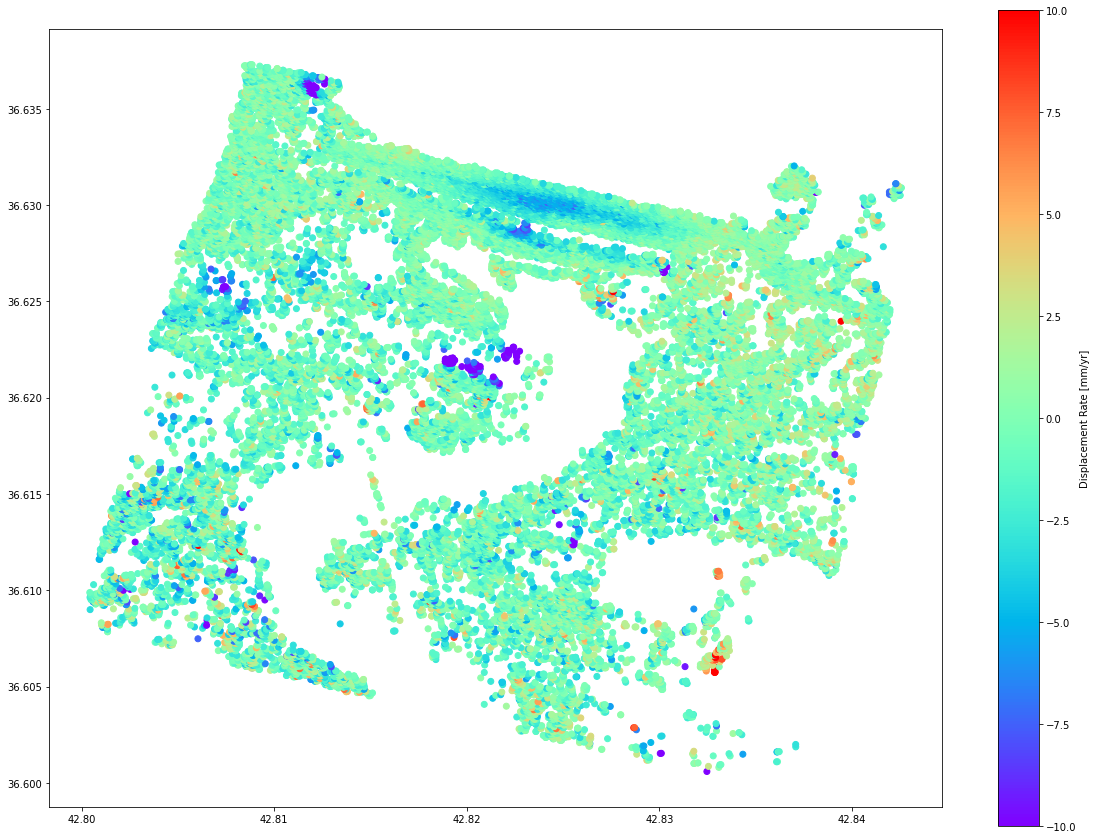

In [10]:

import contextily as ctx

text = 'Displacement rate [mm/yr]' #@param {type:"string"}
dropdown = 'velocity' #@param ["velocity", "coherence", "MuSigma"]
cmap = 'rainbow' #@param ["rainbow", "greys"]
lower_limit = -10.0 #@param {type:"number"} 
upper_limit = 10.0 #@param {type:"number"} 


df_regioni.plot(column=dropdown, figsize=(20,15), cmap='rainbow', legend=True, legend_kwds={"label":"Displacement Rate [mm/yr]"}, vmin=lower_limit, vmax=upper_limit)


# PLOTLY EXPRESS

In [11]:
import plotly.graph_objects as go

In [ ]:
_text = df_regioni['Lat'].astype(str) + '' + df_regioni['Lon'].astype(str) + ', ' + df_regioni['coherence'].astype(str) + '' + 'Velocity: ' + df_regioni['velocity'].astype(str)
d={'lat':df_regioni['Lat'].values[0], 'lon':df_regioni['Lon'].values[0]}

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_regioni['Lon'],
        lat = df_regioni['Lat'],
        text = _text,
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = -10.0,
            color = df_regioni['velocity'],
            cmax = 10.0,
            colorbar_title="Displacement Rate<br>mm/year"
        )))

fig.update_layout(
        title = 'Mosul Dike',
        geo = dict(
            scope='asia',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1.5,
            subunitwidth = 1.5
        ),
    )
fig.show()

In [55]:
import plotly.express as px



_text = df_regioni['Lat'].astype(str) + '' + df_regioni['Lon'].astype(str) + ', ' + df_regioni['coherence'].astype(str) + '' + 'Velocity: ' + df_regioni['velocity'].astype(str)
d={'lat':df_regioni['Lat'].values[0], 'lon':df_regioni['Lon'].values[0]}

fig = px.scatter_mapbox(df_regioni, lat='Lat', lon='Lon', hover_data=["velocity", "coherence"],  zoom=3, height=300,  color="velocity")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

ValueError: ignored